In [1]:
from utils.setup import get_model, set_to_eval
from dataset.videoclip_dataset import VideoRead

from dotmap import DotMap
import matplotlib.pyplot as plt
import numpy as np
import torch 
import yaml 
import os 

def imshow(img):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()


def normalize_clip(s):
    """
    s: Predictions: (*, height, width)
    """
    min_ = s.min((1, 2), keepdims=True)
    max_ = s.max((1, 2), keepdims=True)
    return 255 * (s - min_) / (max_ - min_)

# SalViT360 (w/o VAC)

In [3]:
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

config_fn = 'configs/vst-eval.yml'

config = DotMap(yaml.safe_load(open(config_fn, 'r')))
model = get_model(config).eval()

set_to_eval(model)

model = model.module.to(DEVICE)

Loading state dict from: Epoch_5.pt


In [4]:
def inference(model, video_path, **kwargs):
    video_path = os.path.expanduser(video_path)
    assert os.path.exists(video_path), f"Video path {video_path} does not exist"
    
    video = VideoRead(video_path)
    video = video[100:120]  # Subsample for faster inference
    preds = model.inference(video, **kwargs)
    return video, preds

In [5]:
VIDEO_NAME = '025.mp4'
VIDEO_ROOT = f'~/AVSAL360/__VR-EyeTracking_Dataset_Files/videos_2K_16fps/{VIDEO_NAME}'

frames, preds = inference(model, VIDEO_ROOT)

100%|██████████| 12/12 [00:04<00:00,  2.61it/s]


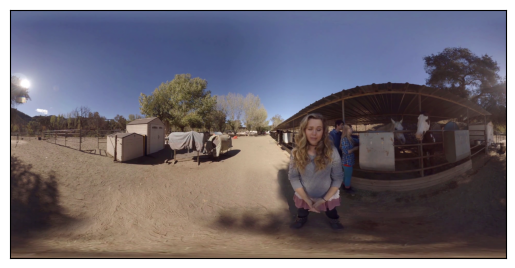

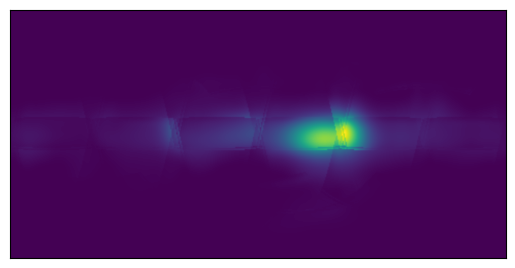

In [6]:
imshow(frames[0])
imshow(preds[0])

# SalViT360 (with Viewport-Augmentation Consistency)

In [7]:
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

config_fn = 'configs/vac-eval.yml'

config = DotMap(yaml.safe_load(open(config_fn, 'r')))
model = get_model(config).eval()

set_to_eval(model)

model = model.module.to(DEVICE)

Loading state dict from: Epoch_9.pt
Unexpected keys: ['decoder.0.block.0.weight', 'decoder.0.block.0.bias', 'decoder.0.block.1.weight', 'decoder.0.block.1.bias', 'decoder.1.block.0.weight', 'decoder.1.block.0.bias', 'decoder.1.block.1.weight', 'decoder.1.block.1.bias', 'decoder.2.block.0.weight', 'decoder.2.block.0.bias', 'decoder.2.block.1.weight', 'decoder.2.block.1.bias']


100%|██████████| 12/12 [00:03<00:00,  3.20it/s]


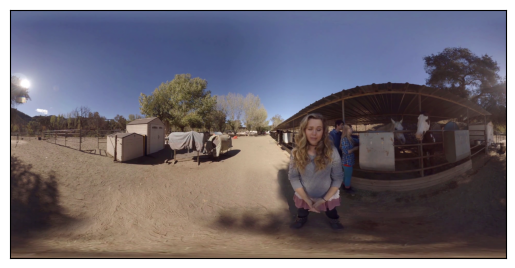

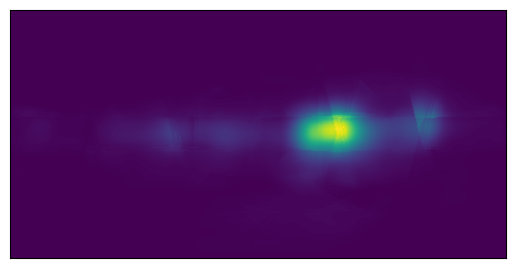

In [8]:
VIDEO_NAME = '025.mp4'
VIDEO_ROOT = f'~/AVSAL360/__VR-EyeTracking_Dataset_Files/videos_2K_16fps/{VIDEO_NAME}'


frames, preds = inference(model, VIDEO_ROOT, late_fusion=False)

imshow(frames[0])
imshow(preds[0])

100%|██████████| 12/12 [00:03<00:00,  3.36it/s]


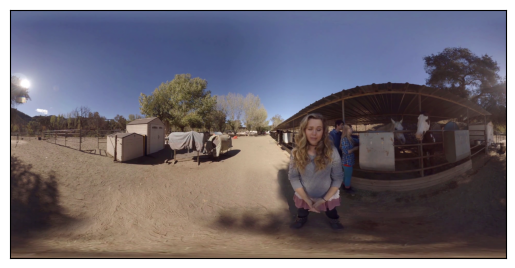

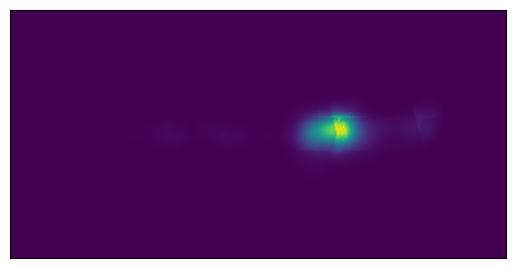

In [9]:
# Optional Late Fusion: Element-wise multiplication of the predictions from two tangent configurations

frames, preds = inference(model, VIDEO_ROOT, late_fusion=True)

imshow(frames[0])
imshow(preds[0])